# Project 2: DepMap Data Analysis

## Integrating Gene Expression and Dependency to Discover Therapeutic Targets

We want to use DepMap gene effect and expression data to investigate the gene PKMYT1.
PKMYT1 is a cell-cycle kinase that prevents premature Cdk1 activation. It has recently gained attention
as a potential cancer target.
In this project we want to find out which cancers depend on PKMYT1, and in which cancers is PKMYT1 highly expressed.
We will then see how expression and dependency are correlated and if this correlation is statistically significant.
In the next stage of the analysis we will find genes that show similar patterns of dependency and expression acrosss all cancer cell lines
using correlation analysis. We will check the top 100 correlated genes and investigate them further:
How much overlap is there between expression and dependency? What pathways is the gene collection enriched for?


**Learning Objectives:**
- Perform exploratory data analysis (EDA) and Quality Control (QC) on complex data sets
- Analyze relationships between gene expression and functional dependencies
- Implement correlation analyses across multiple data modalities
- Integrate multi-omic data to identify therapeutic targets
- Create publication-quality visualizations of complex genomic data

---

## Overview of the Assessment

#### Completing the Assessment

❗ **IMPORTANT: Where to enter your answers**

Enter your answers **only** in the 🟥 🟦 🟩 🟪 **Enter your code and text here** sections below:
- Code cells should include code to perform the analyses specified and to generate the tables, plots, and CSV files
- Text cells should answer the questions posed in each subsection (double-click to edit)

---

#### Marking Criteria: Overview

This notebook consists of 4 parts that should be completed sequentially. The breakdown of marks for each Part are as follows:

| Part | Marks |
|------|--------|
| Part 1: EDA | 20 |
| Part 2: Correlations | 35 |
| Part 3: Enrichment | 35 |
| Part 4: Summary | 10 |
| **Total** | **100** |

Refer to the 🎯 **Marking Criteria** subsections for exact guidance on what to include for Parts 1-4.

---

#### Marking Criteria: Code Quality

A proportion of the marks for your notebook are based on overall quality, organisation, and documentation of your code (see 🎯 Marking Criteria subsections for details).

**Assessment Criteria:**

**1. Code Organisation**
- Clear, readable code following Python conventions (PEP 8)
- No unnecessary code duplication
- Helper functions for repetitive tasks

**2. Code Documentation**
- Meaningful variable and function names (e.g., `pkmyt1_expr` not `x` or `df1`)
- Comments explaining WHY, not just WHAT
- Docstrings for any custom functions

**3. Code Quality**
- Notebook runs from top to bottom without errors
- Output cells show expected results
- All output files (CSVs) and plots can be regenerated
- Random seeds set where applicable

**Tips for Excellence:**
- Create helper functions for repetitive tasks (e.g., `plot_volcano()`, `calculate_correlations()`, `run_enrichment()`)
- Add brief interpretations in markdown after each major result
- Keep code cells focused - one major task per cell
- Use informative commit messages if using version control

---

#### Marking Criteria: Figure Quality

-	Correct/appropriate plot type
- Axis labels with units and figure titles where applicable
-	Appropriate axis ranges and/or scaling (e.g. -log10)
-	Clear, readable labels and legends
-	Good use of colour with consistent colour schemes across figures
-	Appropriate font sizes that are consistent across figures
-	Professional appearance suitable for publication

Also see Part 4 for specific guidance on criteria for the Summary figure.

---
#### Tips for the assessment
- Start early and work incrementally
- Save your work frequently
- Test your code as you go
- Ask questions if you get stuck
- Focus on biological interpretation, not just computational output
- Your goal is to tell a coherent scientific story about PKMYT1

**This assignment will take approximately 20-40 hours, depending on your experience level. Plan accordingly!**

---
#### Submitting the Assessment

You should submit your completed version of this **Colab/Jupyter Notebook** via the Canvas E-submission portal with the filename `Project2_DepMap_Analysis.ipynb`.

Please see the **Assessments and Feedback** page of the module Canvas site for more details.

---
## Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [ ]:
# mounting google drive and getting path to data directory
from google.colab import drive


drive.mount("/content/drive")

# 2. Load the cached files
data_dir = "/content/drive/MyDrive/Colab_Data"

Mounted at /content/drive


---

## Part 1: 🔎 Data Loading and EDA
In this section, you will load the DepMap datasets and perform a thorough exploratory data analysis (EDA). Understanding your data is the critical first step in any computational biology project. You'll characterize the structure, identify potential quality issues, and gain initial insights into PKMYT1's role across cancer cell lines.


### 🎯 Marking Criteria: deliverables for Part 1
- [ ] Well-structured and commented Python code that generates specified analyses and plots
- [ ] Code to generate PKMYT1 expression vs. dependency scatter plot (from Part 1.2)
- [ ] Code to generate PKMYT1 dependency across cancer types (box plot or bar plot from Part 1.3)
- [ ] Written interpretations after each subsection (total ~200 words)

### Tips:
- Use meaningful variable names (e.g., `pkmyt1_expr` not `df1`)
- Add axis labels with units where applicable
- Use consistent color schemes across plots
- Comment your code to explain "why" not just "what"
- Check for and document any unexpected findings (outliers, missing data patterns, etc.)

two### Part 1.1: Load Data and Create Summary Statistics

**Dataset Information:**
You will work with three DepMap datasets:
- `CCLE_expression.csv` - Gene expression data (RNA-seq, log2(TPM+1))
- `CRISPR_gene_effect.csv` - Gene dependency scores (Chronos algorithm)


**Tasks:**

1. **Import required libraries and load datasets**
   - Load the two CSV files using pandas
   - Display the first 5 rows of each dataset to verify successful loading
   - Print the shape (rows × columns) of each dataframe

2. **Data structure analysis**
   - How many cell lines are present in each dataset?
   - How many genes are measured in the expression dataset?
   - How many genes are measured in the dependency dataset?
   - Are the same cell lines present in all three datasets? (Use set operations to check overlap)
   - What are the column names and data types in the metadata file?

3. **Missing value assessment and strategy**
   - Calculate the percentage of missing values in each dataset
   - Create a visualization (bar plot or heatmap) showing missing data patterns
   - For the expression and dependency datasets, which genes have the most missing values?
   
   **Missing Value Strategy:**
   - **For genes:** Exclude genes with >20% missing values across cell lines
   - **For cell lines:** For PKMYT1-specific analyses, use only complete cases
   - **Rationale:** 20% threshold balances data quality with information retention
   - **Document:** Report how many genes/cell lines were removed
   
   ```python
   # Example code structure:
   # Calculate missing percentage per gene
   missing_pct = (df.isnull().sum() / len(df)) * 100
   
   # Filter genes with <20% missing
   genes_to_keep = missing_pct[missing_pct < 20].index
   df_filtered = df[genes_to_keep]
   
   print(f"Removed {len(df.columns) - len(genes_to_keep)} genes due to missing data")
   ```

4. **Descriptive statistics**
   - Generate summary statistics (mean, median, std, min, max, quartiles) for:
     - Gene expression values across all genes
     - Gene dependency scores across all genes
   - Create histograms showing the distribution of:
     - All expression values
     - All dependency scores
   - What do these distributions tell you about the data scaling and normalization?


 **Expected Output:**
- Clear summary tables with row/column counts
- Missing value report with percentages and removal decisions
- Distribution plots with axis labels and titles
- Written interpretation (1-2 sentences) of what the distributions reveal

---

#### 🟥 Enter your code and text here

In [97]:
# Global output formatting
pd.set_option('display.show_dimensions', False)
pd.set_option('display.max_columns', 5)
sns.set_palette('viridis')


# FUNCTION DEFINITIONS

# I/O procedures
def load_depmap(file_path: str, name: str):
  """Loads a depmap .csv file with formatted names, and outputs helpful other
  lists as well/"""
  print(f"Loading {name} dataset into program - this may take a few minutes!")
  depmap = pd.read_csv(file_path)
  depmap.name = name
  depmap.index.name = 'Cell Lines'
  depmap.columns.name = 'Genes'
  # Non-gene columns, i.e. "properties", are auto-detected so that they can be
  # excluded from various comparisons later on. The regex describes a snake case
  # parameter name e.g. example_parameter - lowercase letters and underscores.
  # It is assumed that "property" columns will fit this format.
  properties = depmap[:50].filter(regex='^[a-z_]+$', axis=1).columns
  properties.name = 'Cell Line Properties'
  genes = depmap.columns.drop(properties)
  genes.name = 'Genes'
  cell_lines = depmap['stripped_cell_line_name']
  cell_lines.name = 'Cell Lines'
  return depmap, genes, cell_lines, properties

def print_summary(depmap: pd.DataFrame):
  """Prints a quick summary of a depmap dataframe"""
  print(f"Imported {depmap.name} file contains {depmap.shape[0]} rows and "
    f"{depmap.shape[1]} columns. First five rows:\n{depmap.head()}"
  )

def print_comparison(col1, col2, separator = ', ', final_separator = ' and ',
  on_intersect = "$num values are shared between collections",
  on_diff1 = "$num values are only in the first collection",
  on_diff2 = "$num values are only in the second collection"):
    """Prints a set comparison of two collections to the user. Intended for use
    with depmap columns, but not limited to this case"""
    set1 = set(col1)
    set2 = set(col2)
    to_print = [custom_parse(set1 & set2, on_intersect)]
    diff1 = set1 - set2
    if (len(diff1) > 0):
      to_print.append(custom_parse(diff1, on_diff1))
    diff2 = set2 - set1
    if (len(diff2) > 0):
      to_print.append(custom_parse(diff2, on_diff2))
    print(clever_join(to_print, separator, final_separator))

def filter_and_report(depmap: pd.DataFrame, missing: pd.Series):
  """Filters out columns from a depmap if they have 20% or more missing values,
    and prints a summary of what was done"""
  depmap_filtered = depmap.drop(
      columns=missing[(missing/depmap.shape[0]) > 0.2].index)
  difference = depmap.shape[1] - depmap_filtered.shape[1]
  if difference > 1:
    print(f"{difference} genes in {depmap.name} dataset had >=20% missing"
    "values and were removed - {depmap_filtered.shape[1]/depmap.shape[1]:.2%} "
    "original genes remaining")
  return depmap_filtered

def check_pkmyt1_valid(depmap: pd.DataFrame, missing_counts: pd.Series):
  if (missing_counts.get('PKMYT1') is not None):
    warnings.warn("Gene of interest PKMYT1 has missing values in "
    f"{depmap.name} dataset, the rest of the program won't work properly")

def plot_missing_values(ax: plt.Axes, depmap: pd.DataFrame,  missing: pd.Series):
  """Makes a plot showing the missing values in a depmap"""
  percentages = missing / len(missing)
  sns.barplot(x=percentages.index, y=percentages.values,ax=ax)
  ax.set_title(f"Frequency of missing values per gene in {depmap.name} data")
  ax.set_xlabel(f"Gene ID")
  ax.tick_params(axis='x',labelrotation=45,labelsize='small')
  ax.set_ylabel(f"% of total missing values")
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

def plot_score_distribution(ax, depmap: pd.DataFrame):
  print("I need to have something here for now!")

# Single-scope/logic functions
def clever_join(col, separator = ',', final_separator = ' and '):
  """Like str.join, but allows a different final separator - e.g.
  Apples, Oranges and Pears rather than Apples, Oranges, Pears"""
  if len(col) > 1:
    return ', '.join(col[:-1]) + ' and ' + col[-1]
  elif len(col) == 1:
    return col[0]

def count_missing(depmap: pd.DataFrame):
  """Shows the number of missing values in a depmap, organised by
  column label"""
  missing_sums = depmap.isnull().sum()
  return missing_sums[missing_sums > 0]

def custom_parse(col, statement: str):
    """Internal helper function to parse custom string replacement tags,
    designed for use in the print_comparison function
    """
    statement = statement.replace("$num", str(len(col)))
    if "$col" in statement: # Very slight performance thing
      statement = statement.replace("$col", clever_join(col))
    return statement


# PROGRAM LOGIC START

# Load depmap file and record relevant information (genes, cell lines, etc.)
dependency_depmap, dependency_genes, dependency_lines, dependency_props = \
    load_depmap(data_dir + '/dependency.csv', 'Cancer Gene Dependencies')
expression_depmap, expression_genes, expression_lines, expression_props = \
    load_depmap(data_dir + '/expression.csv', 'RNA Expression Levels')
print("\n")

# Show user a summary of the imported data
print("SUMMARY OF IMPORTED DEPMAPS\n")
print_summary(dependency_depmap)
print()
print_summary(expression_depmap)
print("\n")

# Compare cell lines and genes between both datasets
print("COMMONALITIES BETWEEN DATASETS\n")
print_comparison(dependency_lines, expression_lines,
    on_intersect="In these DepMaps, rows represent cell lines. "
      "$num cell lines are common to both datasets",
    on_diff1="$num cell lines are exclusive to the dependency data",
    on_diff2="$num cell lines are only found in the expression data"
)
print()
print_comparison(dependency_genes, expression_genes,
    on_intersect=
      "Columns represent genes here. $num genes are common to both datasets",
    on_diff1="$num genes are exclusive to the dependency data",
    on_diff2="$num genes are only found in the expression data"
)
print("\nYou may have noticed that the number of genes is slightly "
      "lower than the number of columns for each dataset.")
print_comparison(dependency_props, expression_props,
    on_intersect =
      "A few of them describe cell line properties rather than genes: $col",
    on_diff1 =
      "These extra properties are present in only the dependency data: $col",
    on_diff2 =
      "These extra properties are present in only the expression data: $col",
    separator = '\n', final_separator = '\n')
print()

# TODO decide about this
#del dependency_props, expression_props
# Filter out missing values
print("MISSING VALUE ASSESSMENT\n")

dependency_missing_counts = count_missing(dependency_depmap.drop(dependency_genes))
expression_missing_counts = count_missing(expression_depmap.drop(expression_genes))

dependency_depmap_filtered = filter_and_report(dependency_depmap, dependency_missing_counts)
expression_depmap_filtered = filter_and_report(expression_depmap,expression_missing_counts)

print(f"In dependency data, {len(dependency_missing_counts)} out of \
  {len(dependency_genes)} genes have missing values")
#print(f"Most missing numbers:\n{dependency_missing_counts.sort_values().value_counts()}")
print(f"\nIn expression data, {len(expression_missing_counts)} out of \
  {len(expression_genes)} genes have missing values")
#print(f"Most missing numbers:\n{expression_missing_counts.sort_values().value_counts()}")

# Warns the user if PKMYT1 has missing values
check_pkmyt1_valid(dependency_depmap, dependency_missing_counts)
check_pkmyt1_valid(expression_depmap, expression_missing_counts)

# Summarise statistics with yummy plots
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, figsize=[12, 14])
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Missing value analysis")
plot_missing_values(ax_tl, expression_depmap, expression_missing_counts)
plot_missing_values(ax_tr, dependency_depmap, dependency_missing_counts)



Loading Cancer Gene Dependencies dataset into program - this may take a few minutes!
Loading RNA Expression Levels dataset into program - this may take a few minutes!


SUMMARY OF IMPORTED DEPMAPS

Imported Cancer Gene Dependencies file contains 1165 rows and 17211 columns. First five rows:
Genes         model_id cell_line_name  ...     ZZEF1      ZZZ3
Cell Lines                             ...                    
0           ACH-000001    NIH:OVCAR-3  ...  0.122059 -0.429010
1           ACH-000004            HEL  ...  0.261894 -0.086860
2           ACH-000005     HEL 92.1.7  ...  0.039933 -0.191611
3           ACH-000007          LS513  ... -0.312910 -0.424810
4           ACH-000009         C2BBe1  ... -0.001617 -0.287154

Imported RNA Expression Levels file contains 1091 rows and 17130 columns. First five rows:
Genes         model_id cell_line_name  ...     ZZEF1      ZZZ3
Cell Lines                             ...                    
0           ACH-001270        1273/99  ...  2.087

TypeError: 'set' object is not subscriptable

*Part 1.1 written answers here*

---

 ### Part 1.2: Focus on PKMYT1 - Initial Characterization

Now that you understand the overall dataset structure, let's zoom in on our gene of interest: PKMYT1.

**Tasks:**

1. **Extract PKMYT1 data**
   - Find and extract PKMYT1 expression values across all cell lines
   - Find and extract PKMYT1 dependency scores across all cell lines
   - How many cell lines have data for both expression AND dependency?
   - Create a merged dataframe containing: cell_line_id, PKMYT1_expression, PKMYT1_dependency

2. **PKMYT1 distribution analysis**
    - Create side-by-side histograms or violin plots showing:
      - Distribution of PKMYT1 expression across all cell lines
      - Distribution of PKMYT1 dependency across all cell lines
    - Calculate and report:
      - Mean and median for both metrics
       - Percentage of cell lines that are "dependent" on PKMYT1 (dependency score < -0.5)
       - Percentage of cell lines with "high expression" of PKMYT1 (expression > median)

3. **Initial visualization**
    - Create a scatter plot: PKMYT1 expression (x-axis) vs. PKMYT1 dependency (y-axis)
    - Add a regression line to visualize the trend
    - Color points by whether they are dependent (score < -0.5) or not
    - What is your initial observation? Does higher expression correlate with dependency?

**Expected Output:**
- Clean merged dataframe (cell lines × PKMYT1 metrics)
- Distribution plots with proper labels
- Annotated scatter plot with legend
- Brief interpretation (2-3 sentences)

---


#### 🟥 Enter your code and text here

genes       PKMYT1_expression  PKMYT1_dependency
cell_lines                                      
127399               5.993747          -1.218893
143B                 6.029526          -1.393960
170MGBA              2.509574          -2.182791
21MT2                5.189085          -1.389236
21NT                 5.171679          -1.774140
...                       ...                ...
Z138                 5.277345          -1.780119
ZR751                6.407040          -1.171197
HUH1                 5.373387          -1.231423
MEL202               5.623554          -0.917778
NO10                 4.844692           0.065593


<Axes: xlabel='PKMYT1_expression', ylabel='PKMYT1_dependency'>

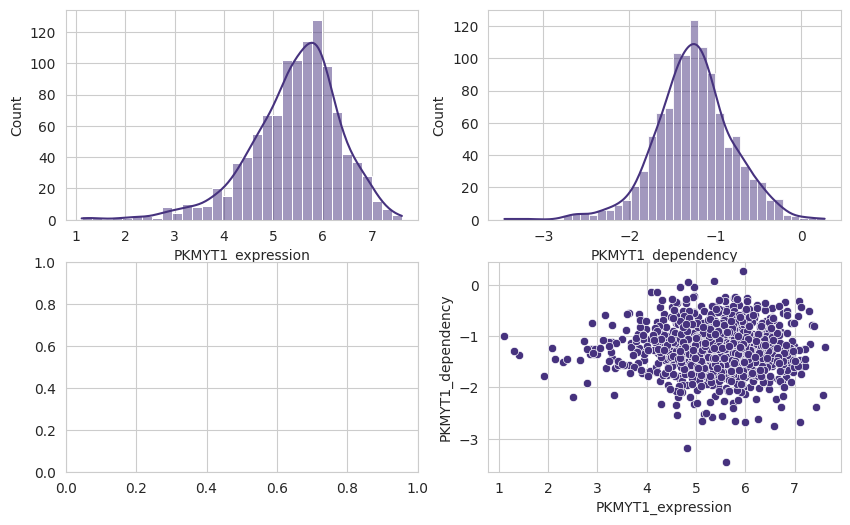

In [94]:
# Not using filtered depmaps here because PMKYT1 should *not* have been
# filtered out at all.
PKMYT1_analysis = expression_depmap[['stripped_cell_line_name', 'PKMYT1']].merge(
    dependency_depmap[['stripped_cell_line_name', 'PKMYT1']],
    left_on ='stripped_cell_line_name', right_on = 'stripped_cell_line_name',
    suffixes=('_expression','_dependency')
).rename(columns={'stripped_cell_line_name': 'cell_lines'}).set_index('cell_lines')
PKMYT1_analysis.name = 'PKMYT1_analysis'
PKMYT1_analysis.columns.name = 'genes'
print(PKMYT1_analysis)

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2,2)
sns.histplot(data=PKMYT1_analysis, x='PKMYT1_expression', ax=ax_tl,kde=True)
sns.histplot(data=PKMYT1_analysis, x='PKMYT1_dependency', ax=ax_tr,kde=True)
sns.scatterplot(data=PKMYT1_analysis, x='PKMYT1_expression',y='PKMYT1_dependency', ax=ax_br)



*Part 1.2 written answers here*

---

### Part 1.3: Cancer Type Analysis

Cancer biology is tissue-specific. Different cancer types may show different dependencies on PKMYT1. Let's integrate the metadata to explore this.

**Tasks:**

1. **Merge with metadata**
   - Create new columns:
     - `is_dependent`: Boolean (True if dependency < -0.5)

2. **Cancer type summary statistics**
   - Group cell lines by primary_disease or lineage
   - For each cancer type, calculate:
     - Number of cell lines
     - Mean PKMYT1 expression
     - Mean PKMYT1 dependency
     - Percentage of dependent cell lines
   - Create a summary table sorted by mean dependency (most dependent first)
   - Which 5 cancer types show the strongest dependency on PKMYT1?

3. **Visualize cancer-specific patterns**
   - Create a grouped bar plot or box plot showing PKMYT1 dependency across cancer types
     - Include only cancer types with at least 5 cell lines
     - Order by median dependency
   - Create a similar plot for PKMYT1 expression across cancer types
   - Create a heatmap showing mean expression and dependency for top 15 cancer types

**Expected Output:**
- Comprehensive summary table (cancer types × statistics)
- Publication-quality plots with clear labels
- Interpretation: Which cancer types are most vulnerable to PKMYT1 inhibition? (1-2 sentences)

---

#### 🟥 Enter your code and text here

In [99]:
# Part 1.3 code here
PKMYT1_analysis['is_dependent'] = PKMYT1_analysis['PKMYT1_dependency'] < -0.5
print(PKMYT1_analysis)

genes       PKMYT1_expression  PKMYT1_dependency  is_dependent
cell_lines                                                    
127399               5.993747          -1.218893          True
143B                 6.029526          -1.393960          True
170MGBA              2.509574          -2.182791          True
21MT2                5.189085          -1.389236          True
21NT                 5.171679          -1.774140          True
...                       ...                ...           ...
Z138                 5.277345          -1.780119          True
ZR751                6.407040          -1.171197          True
HUH1                 5.373387          -1.231423          True
MEL202               5.623554          -0.917778          True
NO10                 4.844692           0.065593         False


*Part 1.3 written answers here*

---

### Part 1.4: Overall Correlation Analysis

Finally, let's quantify the relationship between PKMYT1 expression and dependency statistically.

#### 📊 Understanding Correlation

Before starting, make sure you understand what correlation coefficients mean:

**Pearson correlation (r):** Measures linear relationship, sensitive to outliers  
**Spearman correlation (ρ):** Rank-based, robust to outliers and non-linear monotonic relationships

**Interpretation of correlation strength:**
- |r| < 0.3: Weak correlation
- |r| = 0.3-0.7: Moderate correlation  
- |r| > 0.7: Strong correlation

**P-value interpretation:**
- p < 0.05: "statistically significant" - meaning there is less than a 5% probability of observing an effect at least as extreme as the one in the sample, assuming no true effect exists.
- **IMPORTANT**: Statistically significant ≠ biologically meaningful!
- Always report BOTH correlation coefficient AND p-value
- A correlation can be statistically significant but too weak to be biologically interesting (e.g., r=0.15, p=0.001 with large n)

**When Pearson ≠ Spearman:**
- Large differences suggest outliers, non-linear relationships, or non-normal distributions
- Always check scatter plots when correlations disagree

---

**Tasks:**

1. **Calculate correlation**
   - Calculate Pearson correlation between PKMYT1 expression and dependency
   - Calculate Spearman correlation (rank-based, robust to outliers)
   - Report both correlation coefficients and p-values
   - What do these values tell you? Is the correlation significant?

2. **Visualize the relationship**
   - Create an enhanced scatter plot with:
     - PKMYT1 expression (x) vs. dependency (y)
     - Points colored by cancer lineage (pick top 5-6 lineages)
     - Regression line with confidence interval (use seaborn regplot)
     - Correlation coefficient and p-value annotated on the plot
   - Add reference lines at dependency = -0.5 and expression = median

3. **Stratified correlation analysis**
   - Calculate correlation separately for each major cancer lineage
   - Create a table showing:
     - Cancer type
     - Sample size (n)
     - Correlation coefficient
     - p-value
   - Which cancer types show the strongest correlation?
   - Are there cancer types where the correlation is weak or opposite?

**Expected Output:**
- Statistical summary (correlation table)
- Annotated scatter plot with biological context
- Stratified analysis table
- Interpretation: Does the expression-dependency relationship hold across all cancer types? (2-3 sentences)

---

#### 🟥 Enter your code and text here

In [ ]:
# Part 1.4 code here

*Part 1.4 written answers here*

---

---
---
## Part 2: 🧬 Genome-Wide Correlation Analysis

Now that we understand PKMYT1's individual characteristics, we'll identify genes with similar patterns across cancer cell lines. Co-dependent genes may be part of the same pathway or represent synthetic lethal relationships. Co-expressed genes might share regulatory mechanisms. This analysis will help us understand PKMYT1's biological context and identify potential combination therapy targets.



### Background: Understanding Different Correlation Types

Before starting, ensure you understand what each correlation type reveals:

| Analysis Type | X-axis | Y-axis | Biological Meaning |
|--------------|---------|---------|-------------------|
| **Dependency-Dependency** | PKMYT1 dependency | Gene X dependency | Genes needed together (pathway members) or synthetic lethal pairs |
| **Expression-Expression** | PKMYT1 expression | Gene X expression | Co-regulated genes, pathway co-expression |
| **Expression-Dependency** | PKMYT1 expression | Gene X dependency | Expression of PKMYT1 predicts need for Gene X (biomarker potential) |

**Correlation sign interpretation:**
- **Positive correlation in dependency**: Both genes tend to be essential together (same pathway/complex)
- **Negative correlation in dependency**: When one is essential, the other is not (synthetic lethality, backup pathways)
- **Positive correlation in expression**: Genes co-regulated, possibly functionally related
- **Negative correlation in expression**: Genes inversely regulated



### 🎯 Marking Criteria: deliverables for Part 2
- [ ] Well-structured and commented Python code that generates specified analyses and plots
- [ ] Code to generate volcano plots from correlation analysis (from Part 2.3)
- [ ] Code to generate CSV files of top 100 genes lists for dependency-dependency, expression-expression and expression-dependency analyses (from Part 2.3):
  - `pkmyt1_top100_dep_dep.csv`
  - `pkmyt1_top100_expr_expr.csv`
  - `pkmyt1_top100_expr_dep.csv`
- [ ] Code to generate CSV file of top correlations (from Part 2.3):
  - `pkmyt1_top_correlations_integrated.csv`
- [ ] Written interpretations (~300 words total) specified in each subsection

---

### Tips for Success:
- **Code organization**: Create helper functions for repetitive tasks (e.g., `calculate_correlations()`, `plot_volcano()`, `apply_fdr_correction()`)
- **Memory management**: Don't keep large intermediate dataframes in memory unnecessarily
- **Reproducibility**: Set random seeds if using any sampling
- **Documentation**: Explain your filtering criteria (e.g., why FDR < 0.05?)
- **Biological thinking**: Always ask "what does this correlation mean biologically?"

### Common Pitfalls to Avoid:
- ⚠️ Including PKMYT1 in its own correlation analysis (will always be r=1.0, p=0)
- ⚠️ Mixing up gene names between expression and dependency datasets
- ⚠️ Forgetting to filter for complete cases (NaN handling)
- ⚠️ Not applying FDR correction separately to each analysis
- ⚠️ Using uncorrected p-values after Part 2.2
- ⚠️ Not sorting by absolute correlation values when looking for "strongest" correlations
- ⚠️ Confusing correlation with causation in interpretation

---

### Part 2.1: Compute Genome-Wide Correlations

You'll calculate correlations between PKMYT1 and all other genes in three ways. This is computationally intensive, so code efficiency matters!

**⚡ Performance Tip:** Calculating 18,000 correlations inefficiently can take 15-30 minutes. Using vectorized operations (see template below) reduces this to 1-2 minutes!

**Tasks:**

1. **Prepare data for correlation analysis**
   - Filter datasets to include only cell lines with complete data (no NaN for PKMYT1)
   - Ensure the same cell lines are used across all three analyses
   - Report: How many cell lines remain after filtering?
   - Extract PKMYT1 vectors for each analysis:
     - `pkmyt1_dep`: PKMYT1 dependency scores
     - `pkmyt1_expr`: PKMYT1 expression values
   - **Pro tip**: Remove PKMYT1 itself from the gene lists to avoid self-correlation

2. **Analysis 1: PKMYT1 Dependency vs. All Gene Dependencies**
   - For each gene in the dependency dataset, calculate:
     - Pearson correlation coefficient and p-value
     - Spearman correlation coefficient and p-value
   - Create a results dataframe with columns:
     - `gene_name`
     - `pearson_r_dep`
     - `pearson_p_dep`
     - `spearman_r_dep`
     - `spearman_p_dep`
   - **Use the efficient correlation template below!**
   - How long did this calculation take? (use `%%time` magic command or `time.time()`)

   **💡 Efficient Correlation Code Template:**
   
   ```python
   import pandas as pd
   from scipy.stats import pearsonr, spearmanr
   import time
   
   # Extract PKMYT1 dependency values
   pkmyt1_dep = dependency_df['PKMYT1']
   
   # Get all other genes (remove PKMYT1 to avoid self-correlation)
   other_genes_dep = dependency_df.drop(columns=['PKMYT1'])
   
   # FAST: Use pandas built-in corrwith() for correlation coefficients
   start = time.time()
   pearson_r = other_genes_dep.corrwith(pkmyt1_dep, method='pearson')
   spearman_r = other_genes_dep.corrwith(pkmyt1_dep, method='spearman')
   print(f"✅ Correlation coefficients calculated in {time.time()-start:.2f}s")
   
   # Calculate p-values (requires scipy, slower)
   pearson_p = []
   spearman_p = []
   
   for gene in other_genes_dep.columns:
       # Remove NaN pairs for each gene
       valid_mask = ~(pkmyt1_dep.isna() | other_genes_dep[gene].isna())
       x = pkmyt1_dep[valid_mask]
       y = other_genes_dep[gene][valid_mask]
       
       # Calculate p-values
       _, pp = pearsonr(x, y)
       _, sp = spearmanr(x, y)
       pearson_p.append(pp)
       spearman_p.append(sp)
   
   print(f"✅ P-values calculated in {time.time()-start:.2f}s total")
   
   # Create results dataframe
   results_dep_dep = pd.DataFrame({
       'gene': other_genes_dep.columns,
       'pearson_r': pearson_r.values,
       'pearson_p': pearson_p,
       'spearman_r': spearman_r.values,
       'spearman_p': spearman_p
   })
   
   print(f"✅ Analyzed {len(results_dep_dep)} genes")
   ```

3. **Analysis 2: PKMYT1 Expression vs. All Gene Expression**
   - Repeat the same process for expression data using the template above
   - Adapt the code to use `pkmyt1_expr` and expression dataframe
   - Create a results dataframe with columns:
     - `gene_name`
     - `pearson_r_expr`
     - `pearson_p_expr`
     - `spearman_r_expr`
     - `spearman_p_expr`
   - Save this dataframe for later use

4. **Analysis 3: PKMYT1 Expression vs. All Gene Dependencies (Cross-Modal)**
   - This cross-modal analysis asks: "Does PKMYT1 expression predict dependency on other genes?"
   - Calculate correlations between:
     - X: PKMYT1 expression values
     - Y: Each gene's dependency scores
   - **Important**: Ensure you're matching the same cell lines between expression and dependency datasets!
   - Create results dataframe with columns:
     - `gene_name`
     - `pearson_r_expr_dep`
     - `pearson_p_expr_dep`
     - `spearman_r_expr_dep`
     - `spearman_p_expr_dep`
   - **Biological insight**: Strong positive correlations suggest genes whose essentiality is predictable from PKMYT1 expression (potential biomarkers!)

**Expected Output:**
- Three correlation dataframes (one per analysis type)
- Performance report: computation time for each analysis
- Sanity checks:
  - Verify all correlations are between -1 and 1
  - No NaN values in results
  - Number of genes analyzed matches expectation
- Brief comment: Did the vectorized approach make a difference? (1 sentence)

---


#### 🟦 Enter your code and text here

In [ ]:
# Part 2.1 code here

*Part 2.1 written answers here*

---

### Part 2.2: Multiple Testing Correction

**⚠️ The Multiple Testing Problem**

When testing 18,000 genes at significance level α=0.05, we expect **900 false positives** (18,000 × 0.05)! That is to say that we expect to incorrectly reject the null hypothesis for 900 of the genes! Without correction, your results would be contaminated with hundreds of false discoveries.

**Why This Matters in Genomics:**
- Testing one hypothesis: p<0.05 means 5% chance of false positive
- Testing 18,000 hypotheses: nearly guaranteed to have false positives
- **Solution**: Adjust p-values to control false discovery rate (FDR)

**False Discovery Rate (FDR):**
- FDR < 0.05 means "at most 5% of my significant results are false positives"
- More appropriate than controlling family-wise error rate (FWER) for exploratory genomics
- Less conservative than Bonferroni correction, but maintains statistical rigor

**Bonferroni vs. FDR:**
- **Bonferroni**: Very conservative, controls probability of ANY false positive
  - Adjusted p-value = original p-value × number of tests
  - Use when false positives are very costly
- **FDR (Benjamini-Hochberg)**: Controls proportion of false positives among discoveries
  - Standard in genomics and recommended here
  - Better statistical power while maintaining control

---

**Tasks:**

1. **Quantify the multiple testing problem**
   - Calculate expected false positives: number of genes × 0.05
   - For each of your three analyses (dep-dep, expr-expr, expr-dep):
     - Count genes with uncorrected p < 0.05
     - Compare with expected false positives
   - Create a summary table:
     - Analysis type
     - Total genes tested
     - Expected false positives (at α=0.05)
     - Observed "significant" (p<0.05, uncorrected)
     - Is observed ≈ expected? What does this tell you?

2. **Apply FDR correction**
   - Use `statsmodels.stats.multitest.multipletests()` with method='fdr_bh'
   - Apply to **each analysis separately** (don't mix p-values from different analyses!)
   - Add new columns to each results dataframe:
     - `pearson_fdr`
     - `spearman_fdr`
     - `significant_pearson` (Boolean: FDR < 0.05)
     - `significant_spearman` (Boolean: FDR < 0.05)
   
   **Code Template:**
   ```python
   from statsmodels.stats.multitest import multipletests
   
   # For each analysis (e.g., dep-dep):
   # Apply FDR correction to Pearson p-values
   reject, pvals_corrected, _, _ = multipletests(
       results_dep_dep['pearson_p'],
       method='fdr_bh',
       alpha=0.05
   )
   results_dep_dep['pearson_fdr'] = pvals_corrected
   results_dep_dep['significant_pearson'] = reject
   
   # Repeat for Spearman p-values
   reject, pvals_corrected, _, _ = multipletests(
       results_dep_dep['spearman_p'],
       method='fdr_bh',
       alpha=0.05
   )
   results_dep_dep['spearman_fdr'] = pvals_corrected
   results_dep_dep['significant_spearman'] = reject
   
   # Repeat for expr-expr and expr-dep analyses
   ```

3. **Compare before and after correction**
   - Create a comparison table showing:
     - Analysis type
     - Significant with p < 0.05 (uncorrected)
     - Significant with FDR < 0.05 (corrected)
     - Significant with FDR < 0.01 (strict)
     - Reduction percentage
   - Visualize with grouped bar plot

4. **Interpret the correction**
   - Why did so many genes lose significance after correction?
   - Does this mean the original p-values were "wrong"? (No! Explain why.)
   - Which analysis (dep-dep, expr-expr, expr-dep) retained the most significant genes?
   - What does this tell you about the strength of each biological signal?
   - Write 2-3 sentences addressing these questions

**📌 Important for All Future Analyses:**
From now on, when you refer to "significant" genes, you MUST use FDR < 0.05, not uncorrected p-values. This is standard practice in genomics.

**Expected Output:**
- Updated dataframes with FDR-corrected p-values and significance flags
- Before/after comparison table
- Bar plot comparing significance counts
- Written interpretation explaining the multiple testing problem and its solution

---

#### 🟦 Enter your code and text here

In [ ]:
# Part 2.2 code here

*Part 2.2 written answers here*

---

### Part 2.3: Identify, Visualize, and Integrate Top Correlations

Now let's identify the genes most strongly correlated with PKMYT1, visualize these relationships, and create an integrated analysis.

**Tasks:**

1. **Select top 100 genes per analysis**
   - For each of the three analyses, create a "top 100" dataframe:
     - **For dependency-dependency and expression-expression**:
       - Top 50 positive correlations (sorted by Pearson r, descending)
       - Top 50 negative correlations (sorted by Pearson r, ascending)
     - **For expression-dependency**:
       - Same approach (top 50 positive, top 50 negative)
   - **Requirement**: Genes MUST meet significance threshold (FDR < 0.05)
   - If fewer than 50 meet the threshold in either direction, include all significant genes
   - Add a column `correlation_direction` ("positive" or "negative")
   - Save each list as CSV:
     - `pkmyt1_top100_dep_dep.csv`
     - `pkmyt1_top100_expr_expr.csv`
     - `pkmyt1_top100_expr_dep.csv`

2. **Create volcano plots**
   - For each analysis type, create a volcano plot:
     - X-axis: Pearson correlation coefficient
     - Y-axis: -log10(FDR)
     - Color points:
       - Red: significant positive (FDR < 0.05, r > 0)
       - Blue: significant negative (FDR < 0.05, r < 0)
       - Gray: not significant
     - Label the top 10 most significant genes (5 positive + 5 negative)
   - Add reference lines:
     - Vertical: r = 0 (no correlation)
     - Horizontal: -log10(0.05) ≈ 1.3 (significance threshold)
   - **Pro tip**: Use `adjustText` library or `matplotlib.pyplot.annotate()` with careful positioning

3. **Distribution of correlations**
   - Create histograms showing the distribution of ALL Pearson correlation coefficients for each analysis
   - Overlay:
     - Mean correlation (dashed line)
     - Median correlation (solid line)
     - Cutoffs for top 100 genes (dotted lines)
     - Shade regions corresponding to "significant" (FDR < 0.05)
   - Do correlations appear normally distributed?
   - Compare distributions across the three analyses

4. **Compare Pearson vs. Spearman**
   - Create scatter plots comparing Pearson vs. Spearman correlations for each analysis
   - Calculate the correlation between Pearson and Spearman r values
   - Identify genes where Pearson and Spearman disagree substantially (|difference| > 0.2)
   - **Biological interpretation**: Large disagreements suggest non-linear relationships or outliers
   - Pick 2-3 genes with large disagreements and create scatter plots of their actual data showing why the correlation metrics differ

5. **Integrated results table**
   - Create a master dataframe combining results from all three analyses
   - Include all genes that appear in ANY of the top 100 lists
   - Columns should include:
     - `gene_name`
     - `in_top_dep_dep`, `in_top_expr_expr`, `in_top_expr_dep` (Booleans)
     - `num_lists_present` (count: 1, 2, or 3)
     - All correlation coefficients and FDR values from the three analyses:
       - `pearson_r_dep`, `pearson_fdr_dep`, `spearman_r_dep`, `spearman_fdr_dep`
       - `pearson_r_expr`, `pearson_fdr_expr`, `spearman_r_expr`, `spearman_fdr_expr`
       - `pearson_r_expr_dep`, `pearson_fdr_expr_dep`, `spearman_r_expr_dep`, `spearman_fdr_expr_dep`
   - Sort by: (1) `num_lists_present` (descending), then (2) average |Pearson r| across analyses (descending)
   - Save as: `pkmyt1_top_correlations_integrated.csv`

6. **Overlap analysis with Venn diagram**
   - Create a 3-way Venn diagram showing overlap between the three top 100 gene lists
   - Use the `matplotlib-venn` library
   - Calculate Jaccard similarity coefficients between each pair of lists:
     - Jaccard = |A ∩ B| / |A ∪ B|
   - Create a summary table of:
     - Genes present in all three lists (highest priority!)
     - Genes present in exactly two lists
     - Include their correlation values across all analyses
   - **Code template:**
   ```python
   from matplotlib_venn import venn3
   import matplotlib.pyplot as plt
   
   set1 = set(genes_dep_dep)
   set2 = set(genes_expr_expr)  
   set3 = set(genes_expr_dep)
   
   fig, ax = plt.subplots(figsize=(10, 8))
   venn3([set1, set2, set3],
         set_labels=('Dep-Dep', 'Expr-Expr', 'Expr-Dep'),
         ax=ax)
   plt.title('Overlap of PKMYT1-Correlated Genes Across Analyses', fontsize=14)
   plt.show()
   
   # Get intersections
   core_genes = set1 & set2 & set3
   print(f"Core genes (all 3 lists): {len(core_genes)}")
   print(f"Genes: {sorted(core_genes)}")
   ```

**Expected Output:**
- Three "top 100" CSV files
- One integrated master table CSV
- Three volcano plots with gene annotations
- Three distribution histograms
- Three Pearson vs. Spearman scatter plots
- 2-3 example scatter plots showing Pearson/Spearman disagreements
- Venn diagram with overlap statistics
- Jaccard similarity matrix
- High-priority gene list (genes in 2+ categories with FDR < 0.01 in all analyses)
- Written interpretation (~200 words) addressing:
  - What do the correlation patterns tell us about PKMYT1 biology?
  - Which analysis type gave the most informative results?
  - Do co-dependent genes tend to be co-expressed?
  - What are your top 5 candidate genes for further study and why?

---

#### 🟦 Enter your code and text here

In [ ]:
# Part 2.3 code here

*Part 2.3 written answers here*

---
## Part 3: 🦠 Integration Analysis and Pathway Enrichment

In this final analytical section, you'll integrate your correlation results to identify common biological themes. Which genes appear in multiple correlation lists? What pathways and biological processes are enriched among PKMYT1-correlated genes? This analysis will help you understand PKMYT1's broader role in cancer biology and identify potential therapeutic strategies.



### Background: Gene Set Enrichment Analysis (GSEA)

**Why pathway enrichment matters:**
Finding 100 correlated genes is interesting, but what does it *mean*? Pathway enrichment analysis answers: "Are these genes randomly scattered across biology, or do they cluster in specific pathways?" This tells us whether we're observing real biological signal or just noise.

**Common pathway databases:**
- **GO Biological Process**: Broad biological functions (e.g., "cell cycle", "DNA repair")
- **GO Molecular Function**: Specific molecular activities (e.g., "kinase activity")
- **KEGG**: Metabolic and signaling pathways
- **Reactome**: Curated pathway database
- **MSigDB Hallmarks**: Cancer-relevant gene sets (highly recommended!)



### 🎯 Marking Criteria: deliverables for Part 3

- [ ] Well-structured and commented Python code that generates specified analyses and plots
- [ ] Code to generate Venn diagram showing overlap of top correlations (from Part 3.2)
- [ ] Code to generate top enriched pathways bar plot (from Part 3.3)
- [ ] Code to generate heatmap showing expression/dependency of core genes across cancer types (from Part 3.4)
- [ ] Written interpretations (~300 words) specified in each subsection

---

### Part 3.1: Setup and Install Required Tools

**Tasks:**

1. **Install GSEApy in Google Colab**

```python
!pip install gseapy
import gseapy as gp
```

2. **Verify installation and explore databases**
   - Check available gene set libraries:

```python
# See what databases are available
available_dbs = gp.get_library_name()
print(f"Total databases available: {len(available_dbs)}")

# Filter for relevant ones
for db in available_dbs:
    if 'GO_Biological' in db or 'KEGG' in db or 'MSigDB' in db or 'Hallmark' in db:
        print(db)
```

   - **Recommendation**: Start with these three databases for your enrichment analyses:
     - `'GO_Biological_Process_2023'` - Broad biological functions
     - `'KEGG_2021_Human'` - Curated metabolic and signaling pathways
     - `'MSigDB_Hallmark_2020'` - Cancer-relevant gene sets

**Expected Output:**
- Successful installation confirmation
- List of selected databases with brief justification

---



#### 🟩 Enter your code and text here

In [ ]:
# Part 3.1 code here

*Part 3.1 written answers here*

---

### Part 3.2: Overlap Analysis - Venn Diagrams

Before enrichment, let's understand how much overlap exists between your three correlation analyses.

**Tasks:**

1. **Prepare gene lists**
   - From Part 2, extract three gene lists (top 100 from each analysis):
     - `genes_dep_dep`: Genes correlated with PKMYT1 dependency (in dependency data)
     - `genes_expr_expr`: Genes correlated with PKMYT1 expression (in expression data)
     - `genes_expr_dep`: Genes whose dependency correlates with PKMYT1 expression
   - Convert to Python sets for overlap calculations
   - Report the size of each set
   - For each list, also separate into positive vs. negative correlations

2. **Create 3-way Venn diagram for all genes**
   - Generate a 3-way Venn diagram showing all overlaps between the three analyses
   - Use the code template below
   - Customize with:
     - Set labels (clear, descriptive names)
     - Count labels in each region
     - Colors matching your previous plots
     - Title: "Overlap of PKMYT1-Correlated Genes Across Analyses"
   
   **Code Template:**
   ```python
   from matplotlib_venn import venn3
   import matplotlib.pyplot as plt
   
   # Prepare sets
   set1 = set(genes_dep_dep)
   set2 = set(genes_expr_expr)  
   set3 = set(genes_expr_dep)
   
   # Create Venn diagram
   fig, ax = plt.subplots(figsize=(10, 8))
   venn = venn3([set1, set2, set3],
                 set_labels=('Dep-Dep\nCorrelated',
                            'Expr-Expr\nCorrelated',
                            'Expr-Dep\nCorrelated'),
                 ax=ax)
   plt.title('Overlap of PKMYT1-Correlated Genes Across Analyses',
             fontsize=14, fontweight='bold')
   plt.show()
   
   # Calculate overlaps
   all_three = set1 & set2 & set3
   dep_expr = (set1 & set2) - set3
   dep_cross = (set1 & set3) - set2
   expr_cross = (set2 & set3) - set1
   
   print(f"\\nGenes in all three lists: {len(all_three)}")
   print(f"Genes in Dep-Dep AND Expr-Expr only: {len(dep_expr)}")
   print(f"Genes in Dep-Dep AND Expr-Dep only: {len(dep_cross)}")
   print(f"Genes in Expr-Expr AND Expr-Dep only: {len(expr_cross)}")
   ```

3. **Calculate Jaccard similarity**
   - Calculate Jaccard similarity coefficients between each pair of lists
   - Jaccard similarity = |A ∩ B| / |A ∪ B|
   - Create a similarity matrix showing:
     - Dep-Dep vs. Expr-Expr
     - Dep-Dep vs. Expr-Dep
     - Expr-Expr vs. Expr-Dep
   - Which pair of analyses has the most overlap?
   
   ```python
   # Calculate Jaccard similarities
   def jaccard_similarity(set1, set2):
       intersection = len(set1 & set2)
       union = len(set1 | set2)
       return intersection / union if union > 0 else 0
   
   j_dep_expr = jaccard_similarity(set1, set2)
   j_dep_cross = jaccard_similarity(set1, set3)
   j_expr_cross = jaccard_similarity(set2, set3)
   
   print(f"Jaccard similarity (Dep-Dep vs Expr-Expr): {j_dep_expr:.3f}")
   print(f"Jaccard similarity (Dep-Dep vs Expr-Dep): {j_dep_cross:.3f}")
   print(f"Jaccard similarity (Expr-Expr vs Expr-Dep): {j_expr_cross:.3f}")
   ```

4. **Separate analysis by correlation direction**
   - Create separate Venn diagrams for:
     - Positively correlated genes (in all three analyses)
     - Negatively correlated genes (in all three analyses)
   - This requires 2 separate 3-way Venns
   - Do you see different overlap patterns for positive vs. negative correlations?
   - **Biological interpretation**:
     - Positively correlated genes: likely in same pathway/complex as PKMYT1
     - Negatively correlated genes: may represent compensatory pathways

**Expected Output:**
- Clear, publication-quality Venn diagrams (3 total: all, positive, negative)
- Jaccard similarity matrix
- List of "core" genes (present in all three lists)
- Detailed table of genes in each overlap region with their correlation values
- Interpretation: What does the overlap pattern tell you? (2-3 sentences)

---

#### 🟩 Enter your code and text here

In [ ]:
# Part 3.2 code here

*Part 3.2 written answers here*

---

### Part 3.3: Gene Set Enrichment Analysis - Separate Lists

Now perform enrichment analysis on each of your three gene lists separately. For this task, you'll independently learn to use a new package (GSEApy) - an essential skill for computational biology!

**📚 Learning Resources:**
- Official documentation: https://gseapy.readthedocs.io/en/latest/
- Focus on the `enrichr()` function for over-representation analysis

**🧪 GSEApy Quick Start Example:**

Before analyzing your real data, test with known cell cycle genes to verify your setup works:

```python
import gseapy as gp

# Test with known cell cycle genes (should give clear cell cycle pathways!)
test_genes = ['CDK1', 'CCNB1', 'PLK1', 'AURKA', 'CDC20',
              'BUB1', 'CCNA2', 'CDC25C', 'CDK2', 'CCNE1']

# Run enrichment
enr_test = gp.enrichr(
    gene_list=test_genes,
    gene_sets='GO_Biological_Process_2023',
    organism='human',
    cutoff=0.05  # FDR threshold
)

# View results
print("\\n✅ Top enriched pathways (should see cell cycle!):")
print(enr_test.results[['Term', 'Adjusted P-value', 'Genes']].head(10))

# Create bar plot
gp.barplot(enr_test.results,
          title='Test: Cell Cycle Gene Enrichment',
          cutoff=0.05)

# ✅ You should see pathways like "cell cycle", "mitotic nuclear division", etc.
# If this works, you're ready to analyze your PKMYT1-correlated genes!
```

---

**Tasks:**

1. **Enrichment for Dependency-Dependency correlations**
   - Use your `genes_dep_dep` list (top 100 genes correlated with PKMYT1 dependency)
   - Run `gseapy.enrichr()` against three databases:
     - `'GO_Biological_Process_2023'`
     - `'KEGG_2021_Human'`
     - `'MSigDB_Hallmark_2020'`
   - Set parameters:
     - `cutoff=0.05` (FDR threshold)
     - `organism='human'`
   - For each database:
     - Save results to a dataframe
     - Report number of significant pathways (Adjusted P-value < 0.05)
     - Show top 10 pathways with their p-values
   - Create bar plots showing top 10 pathways from each database

2. **Enrichment for Expression-Expression correlations**
   - Repeat the same process for `genes_expr_expr`
   - Compare with dependency-dependency results:
     - Are the same pathways enriched?
     - Are there expression-specific findings?
   - Create a side-by-side comparison plot (dep-dep vs expr-expr top pathways)

3. **Enrichment for Expression-Dependency correlations**
   - Repeat for `genes_expr_dep` (cross-modal analysis)
   - This list may show different biology - genes predictable from PKMYT1 expression
   - Are there unique pathways not seen in the other analyses?

4. **Separate by correlation direction**
   - For each analysis type, split gene lists by direction:
     - **Positively correlated**: Co-essential/co-expressed with PKMYT1
     - **Negatively correlated**: Anti-correlated with PKMYT1
   - Run enrichment separately for each direction
   - Create comparison tables showing:
     - Analysis type (dep-dep, expr-expr, expr-dep)
     - Direction (positive vs negative)
     - Top 5 pathways for each
   - **Key biological question**:
     - Do positively correlated genes show PKMYT1-related pathways (cell cycle, DNA repair)?
     - Do negatively correlated genes show compensatory pathways?
   - Create a comprehensive figure with 6 bar plots (3 analyses × 2 directions)

**Expected Output:**
- 9 enrichment result dataframes (3 analyses × 3 databases)
- 6 additional enrichment results (3 analyses × 2 directions, using best database)
- Bar plots for top pathways (at least 6 plots)
- Comparison tables across analyses
- Written interpretation (4-5 sentences) addressing:
  - What are the dominant biological themes for PKMYT1-correlated genes?
  - Do the three analysis types converge on similar biology?
  - What's different between positively and negatively correlated gene sets?
  - Are there surprising pathways you didn't expect?

**Tips:**
- Start with the test example to verify your code works!
- Save all enrichment results - you'll need them for Part 4
- If a gene list returns no significant pathways, try relaxing cutoff to 0.10
- Document any warnings or errors from GSEApy
- Some gene symbols may not be recognized - note how many genes were actually used

---

#### 🟩 Enter your code and text here

In [ ]:
# Part 3.3 code here

*Part 3.3 written answers here*

---

### Part 3.4: Comprehensive Integration and Core Gene Analysis

Now that you've performed enrichment on individual gene lists, let's integrate everything to identify the most robust findings.

**Tasks:**

**1. Core Gene Identification and Characterization**
- Identify "core genes" that appear in 2 or more of your top 100 lists
- Create a detailed table for these core genes showing:
  - Gene name
  - Which lists it appears in (dep-dep, expr-expr, expr-dep)
  - Correlation coefficients from all three analyses
  - FDR values from all three analyses
  - Known function (look up 2-3 of the most interesting ones)
- How many core genes did you identify?
- Create a heatmap showing correlation values for core genes across the three analyses

**2. Core Gene Enrichment Analysis**
- Take your "core genes" (present in 2+ lists) as a single gene set
- Run enrichment analysis on this integrated list
- Compare results with individual list enrichments from Part 3.3
- Are there pathways enriched in core genes that weren't obvious from individual analyses?
- Create a bar plot showing top 15 pathways enriched in core genes
- **Interpretation**: What biological story emerges from these highly robust genes?

**3. Cancer Type-Specific Correlation Patterns**
- For your top 10 core genes, examine if correlation patterns differ by cancer type
- Create a heatmap showing correlation (PKMYT1-gene) for each cancer lineage
- Are there cancer types where certain genes show particularly strong/weak correlations?
- Does this reveal cancer type-specific biology?
- **Code tip**:
  ```python
  # For each core gene and cancer type, calculate correlation
  results = []
  for gene in core_genes:
      for cancer_type in cancer_types:
          subset = df[df['lineage'] == cancer_type]
          if len(subset) >= 5:  # Minimum sample size
              r, p = pearsonr(subset['PKMYT1'], subset[gene])
              results.append({'gene': gene, 'cancer': cancer_type, 'r': r, 'p': p})
  
  # Create heatmap from results
  pivot = pd.DataFrame(results).pivot(index='gene', columns='cancer', values='r')
  sns.heatmap(pivot, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
  ```

**4. Therapeutic Target Prioritization**
- Create a "therapeutic potential score" for each core gene based on:
  - Strength of correlation with PKMYT1 (average absolute value |r| across analyses)
  - Consistency (present in how many lists?)
  - Pathway membership (is it in druggable pathways?)
  - Dependency score (is it also essential in cancer cells?)
- Rank your core genes by therapeutic potential
- Create a table showing:
  - Top 10 genes ranked by therapeutic potential
  - Your scoring criteria
  - Why each might be a good combination therapy target with PKMYT1
- **Discussion**: Which 3 genes would you prioritize for experimental validation? Why?

**Expected Output:**
- Core gene characterization table
- Heatmaps showing correlation patterns
- Enrichment analysis results for core genes
- Cancer type-specific correlation heatmap
- Therapeutic prioritization ranking
- Written interpretation (3-4 sentences) addressing:
  - What makes the core genes special?
  - What biological themes emerge?
  - Which genes are the best therapeutic targets?
  - Do different cancer types show different dependencies?

  ---

#### 🟩 Enter your code and text here

In [ ]:
# Part 3.4 code here

*Part 3.4 written answers here*

---
## Part 4: 🌟 Final Synthesis

In this final section, you'll synthesize all your findings into a comprehensive summary figure and accompanying legend explaining your data and conclusions. This demonstrates your ability to communicate computational biology results effectively - a critical skill for any researcher.


### 🎯 Marking Criteria: deliverables for Part 4
- Code to generate a comprehensive multi-panel figure
- Code to save both PNG and PDF versions
- Figure legend in markdown cell explaining each panel (~200 words)

### Part 4.1: Create Summary Figure

Create a multi-panel publication-quality figure (named **Figure 1**) that tells the complete story of your analysis.

**Requirements:**

1. **Panel Layout**
   - Create a figure with 6 panels (2 rows × 3 columns OR 3 rows × 2 columns)
   - Each panel should be clearly labeled (A, B, C, D, E, F)
   - Use consistent color schemes across panels
   - Include a comprehensive figure legend

2. **Required Panels**:
   - **Panel A**: PKMYT1 expression vs. dependency scatter plot (from Part 1.2)
   - **Panel B**: PKMYT1 dependency across cancer types (box plot or bar plot from Part 1.3)
   - **Panel C**: Volcano plot from one correlation analysis (your choice of best one from Part 2.3)
   - **Panel D**: Venn diagram showing overlap of top correlations (from Part 3.2)
   - **Panel E**: Top enriched pathways (bar plot from Part 3.3)
   - **Panel F**: Heatmap showing expression/dependency of core genes across cancer types (from Part 3.4)

3. **Figure Quality**:
   - High resolution (at least 300 DPI)
   - Clear, readable labels and legends
   - Consistent font sizes
   - Professional appearance suitable for publication
   - Save as both PNG and PDF formats

**Code Tip:**
```python
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with subplots
fig = plt.figure(figsize=(18, 12), dpi=300)
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

# Panel A
ax1 = fig.add_subplot(gs[0, 0])
# ... your plot code ...
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes,
        fontsize=16, fontweight='bold')

# Panel B
ax2 = fig.add_subplot(gs[0, 1])
# ... your plot code ...
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes,
        fontsize=16, fontweight='bold')

# Continue for panels C, D, E, F...

plt.savefig('Figure1_PKMYT1_Analysis_Summary.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure1_PKMYT1_Analysis_Summary.pdf', bbox_inches='tight')
plt.show()
```

---

#### 🟪 Enter your code and text here

In [ ]:
# Part 4.1 code here

*Part 4.1 written answer here*